In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import ListedColormap


In [4]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [18]:
or_data['input1'] = [1,1,0,0]
or_data['input2'] = [1,0,1,0]
or_data['output'] = [1,1,1,0]

In [19]:
and_data['input1'] = [1,1,0,0]
and_data['input2'] = [1,0,1,0]
and_data['output'] = [1,0,0,0]

In [20]:
xor_data['input1'] = [1,1,0,0]
xor_data['input2'] = [1,0,1,0]
xor_data['output'] = [0,1,1,0]

In [21]:
or_data

,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [22]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [23]:
xor_data

,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

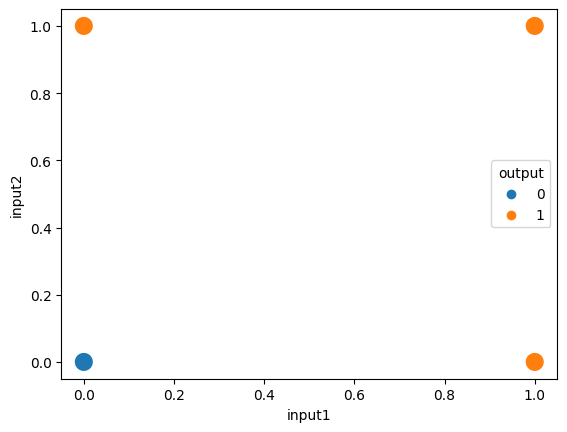

In [25]:
sns.scatterplot(data=or_data, x='input1',y='input2',hue='output',s=200)

<Axes: xlabel='input1', ylabel='input2'>

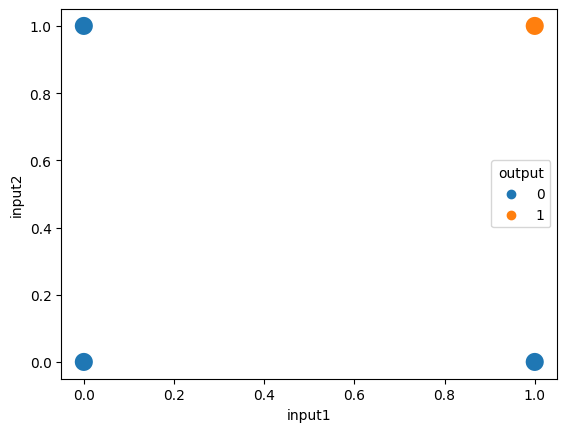

In [26]:
sns.scatterplot(data=and_data,x='input1',y='input2',hue='output',s=200)

<Axes: xlabel='input1', ylabel='input2'>

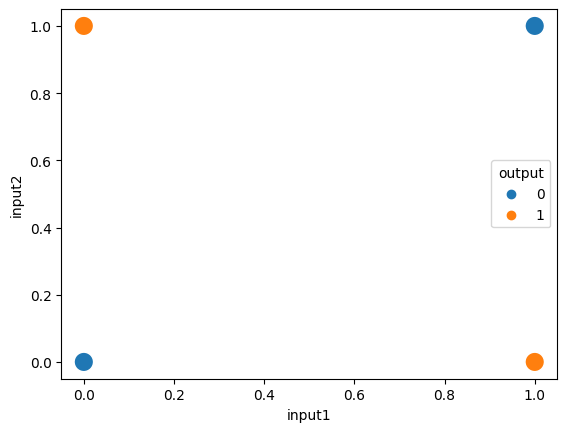

In [27]:
sns.scatterplot(data=xor_data,x='input1',y='input2',hue='output',s=200)

In [29]:
from sklearn.linear_model import Perceptron

In [30]:
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

In [32]:
clf1.fit(or_data.iloc[:,0:2].values, or_data.iloc[:,-1].values)
clf2.fit(and_data.iloc[:,0:2].values, and_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values, xor_data.iloc[:,-1].values)

Perceptron()

In [33]:
clf1.coef_

array([[2., 2.]])

In [34]:
clf1.intercept_

array([-1.])

In [35]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

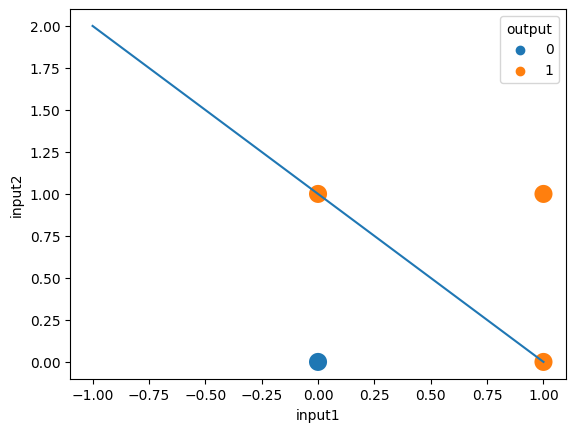

In [38]:
plt.plot(x,y)
sns.scatterplot(data=or_data,x='input1',y='input2',hue='output',s=200)

In [41]:
clf2.coef_

array([[2., 2.]])

In [42]:
clf2.intercept_

array([-2.])

In [43]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

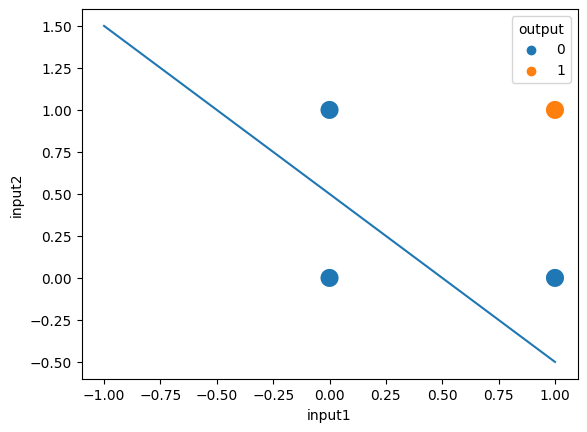

In [44]:
plt.plot(x1,y1)
sns.scatterplot(data=and_data,x='input1',y='input2',hue='output',s=200)

In [45]:
clf3.coef_

array([[0., 0.]])

In [46]:
clf3.intercept_

array([0.])

In [51]:
def plot_decision_regions(X, y, clf, legend=2):
    # Setup markers and colors
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left', scatterpoints=1, ncol=1, fontsize=8)

/tmp/ipykernel_33/256342886.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


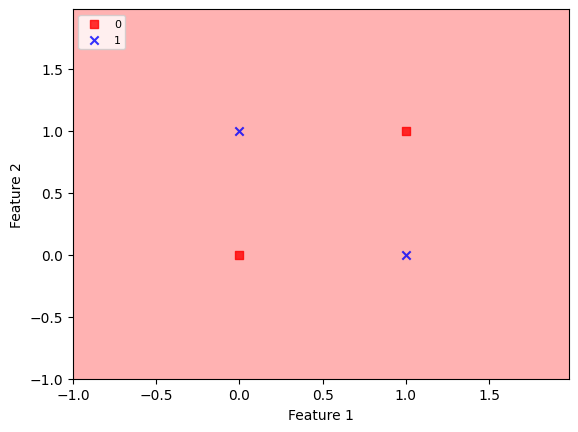

In [52]:
# Example usage
plot_decision_regions(xor_data.iloc[:, 0:2].values, xor_data.iloc[:, -1].values, clf=clf3, legend=2)
plt.show()

The Perceptron is a linear classifier, meaning it can only separate data with a straight line. The XOR problem cannot be solved by a straight line because its data is not linearly separable; you need non-linear boundaries to separate the classes. This is why the Perceptron fails with XOR. To handle such non-linear problems, you need a Multi-Layer Perceptron (MLP) or neural network that uses hidden layers and non-linear activation functions.